<a href="https://colab.research.google.com/github/mrinaligupta255/Python-Libraries-for-Data-Science/blob/master/matplotlib_for_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MATPLOTLIB  PRACTISE

In [0]:
#%matplotlib qt    

#used for drawng interactive 3d plots .works in jupyter notebook doesnt work with colab

In [0]:
import matplotlib.pyplot as plt

Frequently used commands in the given examples:

    plt.figure(): To create a new figure
    plt.plot(): Plot y versus x as lines and/or markers
    plt.xlabel(): Set the label for the x-axis
    plt.ylabel(): Set the label for the y-axis
    plt.title(): Set a title for the axes
    plt.grid(): Configure the grid lines
    plt.legend(): Place a legend on the axes
    plt.savefig(): To save the current figure on the disk
    plt.show(): Display a figure
    plt.clf(): Clear the current figure(useful to plot multiple figures in the same code)

#Practise on Vancouver property tax report dataset 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [8]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/gdrive/My Drive/Datasets/data_property_tax_report_2018.csv')
#print(df.shape)
#print(df.columns)
year_build=df['YEAR_BUILT']
#print(year_build)
#print(df[1:4])
#print(df.iloc[1:4,1:7])
#print(df.count())   # counts the number of non null value in earch dataframe column
print(df.YEAR_BUILT.count()) # give count of a particular column

194899


The dataset contains total 205346 records and 28 columns each records
205346x23

columns=

    ['PID', 'LEGAL_TYPE', 'FOLIO', 'LAND_COORDINATE', 'ZONE_NAME',
          'ZONE_CATEGORY', 'LOT', 'BLOCK', 'PLAN', 'DISTRICT_LOT',
          'FROM_CIVIC_NUMBER', 'TO_CIVIC_NUMBER', 'STREET_NAME',
          'PROPERTY_POSTAL_CODE', 'NARRATIVE_LEGAL_LINE1',
          'NARRATIVE_LEGAL_LINE2', 'NARRATIVE_LEGAL_LINE3',
          'NARRATIVE_LEGAL_LINE4', 'NARRATIVE_LEGAL_LINE5', 'CURRENT_LAND_VALUE',
          'CURRENT_IMPROVEMENT_VALUE', 'TAX_ASSESSMENT_YEAR',
          'PREVIOUS_LAND_VALUE', 'PREVIOUS_IMPROVEMENT_VALUE', 'YEAR_BUILT',
          'BIG_IMPROVEMENT_YEAR', 'TAX_LEVY', 'NEIGHBOURHOOD_CODE']

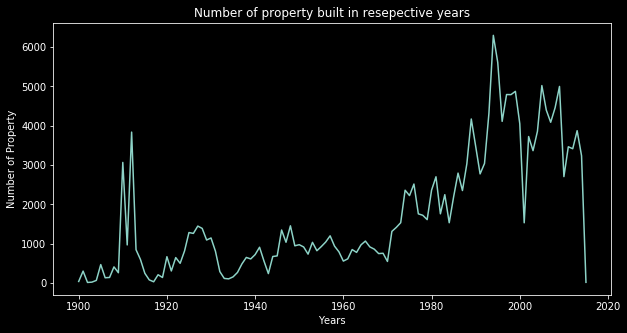

In [9]:
#grouping th number of biulding based on the year
df1 = df[(df['YEAR_BUILT'] >= 1900) & (df['YEAR_BUILT'] <= 2018)]
property_built=df1.groupby('YEAR_BUILT',as_index=False).count()
property_built=property_built[['PID','YEAR_BUILT']].rename(columns={'PID':'Number of properties build'})
x=property_built['YEAR_BUILT']
y=property_built['Number of properties build']   

#plotting a line graph
plt.style.use(['dark_background']) # for dark theme,plots to come clear use this code...omly for dark theme,light theme doesnt require

plt.figure(figsize=(10,5))
plt.plot(x,y,label='number of properties built')
plt.title('Number of property built in resepective years')
plt.xlabel('Years')
plt.ylabel('Number of Property')
plt.savefig('LinePlot.jpg')
plt.show()


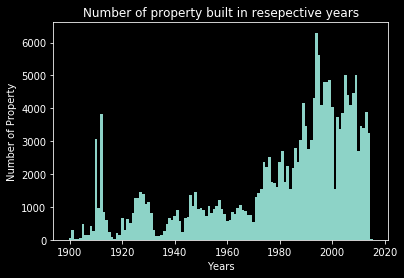

In [0]:

##Barplot
plt.clf()
plt.bar(x,y,width=1)
plt.title('Number of property built in resepective years')
plt.xlabel('Years')
plt.ylabel('Number of Property')
plt.savefig('BarPlot.jpg')
plt.show()

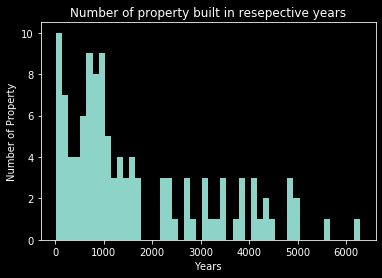

In [0]:
##histogram
plt.clf()
plt.hist(y,bins=50)
plt.title('Number of property built in resepective years')
plt.xlabel('Years')
plt.ylabel('Number of Property')
plt.savefig('BarPlot.jpg')
plt.show()


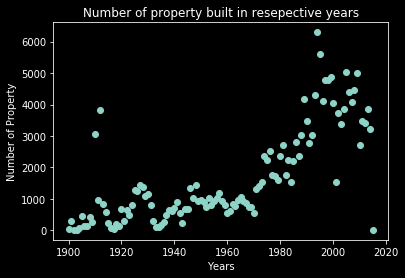

In [0]:
##Scatter plot
plt.clf()
plt.scatter(x,y)
plt.title('Number of property built in resepective years')
plt.xlabel('Years')
plt.ylabel('Number of Property')
plt.savefig('scatterPlot.jpg')
plt.show()


               ZONE_CATEGORY  No of properties
7        One Family Dwelling             67299
1  Comprehensive Development             62794
6   Multiple Family Dwelling             26856
0                 Commercial             16874
8        Two Family Dwelling             14231


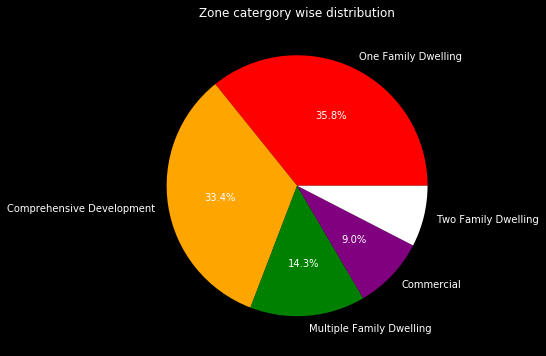

In [0]:
##Pie Chart

zone=df[(df.ZONE_CATEGORY.notnull())]
zone_grouped=zone.groupby('ZONE_CATEGORY',as_index=False)['PID'].count().rename(columns={'PID':'No of properties'})
zone_grouped=zone_grouped.sort_values(by='No of properties')
#taking top 5 %
zone_grouped=zone_grouped.nlargest(n=5,columns='No of properties')
print(zone_grouped)

#getting percentage of every Zone_category
total_property=zone_grouped['No of properties'].sum()
percentage_property=zone_grouped['No of properties']*100/total_property
categories=zone_grouped.ZONE_CATEGORY

plt.figure(figsize=(6,6))
colours=['red','orange','green','purple','white']

plt.pie(percentage_property,labels=categories,autopct = '%1.1f%%',colors=colours)
plt.title('Zone catergory wise distribution')
plt.show()

##3D Plots for more complex data visualization

3D plots play an important role in visualizing complex data in three or more dimensions.

In [0]:
##3D scatterplot
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D

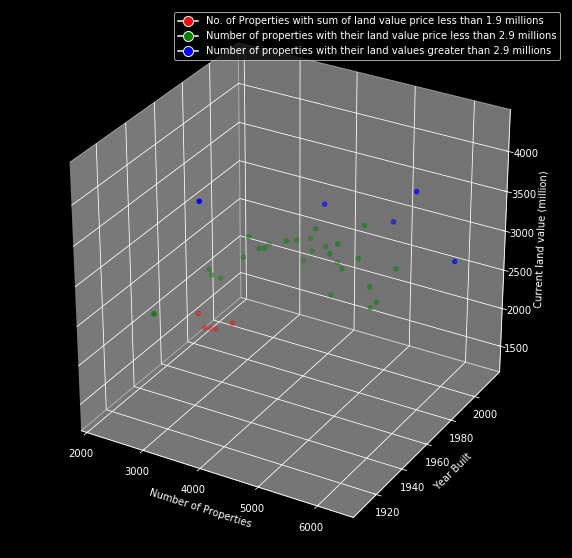

In [11]:
matplotlib.interactive(True)
df1=df[['YEAR_BUILT','PID','CURRENT_LAND_VALUE']].groupby('YEAR_BUILT',as_index=False).agg({'PID': 'count','CURRENT_LAND_VALUE':'sum'})
df1=df1.dropna()
#print(df1)
morethan2k=df1[df1['PID']>2000]
#print(morethan2k.reset_index())
lanvalues = (morethan2k['CURRENT_LAND_VALUE']/2e6).tolist()

colors=['r','g','b']
# Create a list of colors for each point corresponding to x and y
c_list = []
for i,value in enumerate(lanvalues):
    if value>0 and value<1900:
        c_list.append(colors[0])
    elif value>=1900 and value<2900:
        c_list.append(colors[1])
    else:
        c_list.append(colors[2])

fig=plt.figure(figsize=(10,10))
ax=fig.gca(projection='3d')
ax.scatter(morethan2k['PID'], morethan2k['YEAR_BUILT'], morethan2k['CURRENT_LAND_VALUE']/2e6,c=c_list)
# Set labels according to axis
plt.xlabel('Number of Properties')
plt.ylabel('Year Built')
ax.set_zlabel('Current land value (million)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='No. of Properties with sum of land value price less than 1.9 millions',markerfacecolor='r', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Number of properties with their land value price less than 2.9 millions',markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Number of properties with their land values greater than 2.9 millions',markerfacecolor='b', markersize=10)
                  ]
                   
# Make legend
ax.legend(handles=legend_elements, loc='best')
plt.show()
